In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


In [11]:
engine.execute('SELECT * FROM Station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [12]:
engine.execute('SELECT * FROM Measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

# Precipitation Analysis
* Design a query to retrieve the last 12 months of precipitation data and plot the results
* Calculate the date 1 year ago from the last data point in the database
* Perform a query to retrieve the data and precipitation scores
* Save the query results as a Pandas DataFrame and set the index to the date column
* Sort the dataframe by date
* Use Pandas Plotting with Matplotlib to plot the data

In [13]:
#Find the last day in the data
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [14]:
# Calculate the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23)- dt.timedelta(days=365)
print(one_year_ago)

2016-08-23


In [15]:
# Perform a query to retrieve the data and precipitation scores
rain = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > one_year_ago).\
order_by(Measurement.date).all()
print(rain)

7-03-17', 0.19), ('2017-03-17', 0.06), ('2017-03-17', None), ('2017-03-17', 0.35), ('2017-03-17', 0.12), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', 0.0), ('2017-03-18', None), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-19', 0.0), ('2017-03-20', 0.0), ('2017-03-20', 0.0), ('2017-03-20', None), ('2017-03-20', 0.0), ('2017-03-20', 0.02), ('2017-03-20', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.0), ('2017-03-21', 0.09), ('2017-03-21', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-22', 0.0), ('2017-03-23', 0.0), ('2017-03-23', 0.0), ('2017-03-23', 0.0), ('2017-03-23', 0.02), ('2017-03-23', 0.0), ('2017-03-23', 0.03), ('2017-03-24', 0.02), ('2017-03-24', 0.6), ('2017-03-24', 0.15), ('2017-03-24', 0.07), ('2017-03-24', 0.12), ('2017-03-24', 0.17), ('2017-03-25', 0.0), ('

In [16]:
#Save the query results as a Pandas DataFrame
rain_df = pd.DataFrame(rain)
#Set the index to the date column
rain_df.set_index('date')

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [17]:
# Sort the dataframe by date
rain_df.sort_values('date')

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


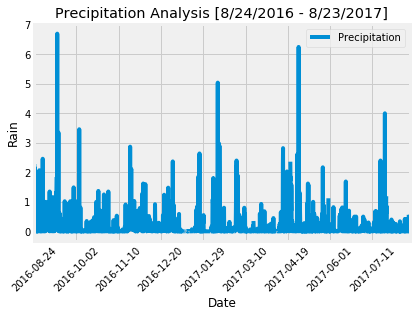

In [18]:
#Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot('date', 'prcp')
plt.xlabel('Date')
plt.ylabel('Rain')
plt.legend(['Precipitation'], loc = 'upper right')
plt.title('Precipitation Analysis [8/24/2016 - 8/23/2017]')
plt.xticks(rotation=45)
plt.show()

In [19]:
#Save the query results as a Pandas DataFrame
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis
* Design a query to show how many stations are available in this dataset?
* What are the most active stations? (i.e. what stations have the most rows)?
* List the stations and the counts in descending order.


In [20]:
#Design a query to show how many stations are available in this dataset?
number_of_stations = session.query(Measurement).group_by(Measurement.station).count()
print(number_of_stations)

9


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
# List the stations and the counts in descending order.
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_temp = session.query(func.max(Measurement.tobs), func.min(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()
station_temp

[(85.0, 54.0, 71.66378066378067)]

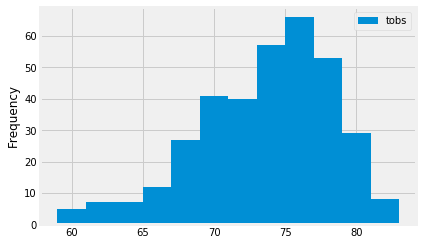

In [23]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# import datetime as dt
from pandas.plotting import table
one_year_ago = dt.date(2017, 8, 23)- dt.timedelta(days=365)

results = session.query(Measurement.tobs).\
    filter(Measurement.station =='USC00519281').\
    filter(Measurement.date >= one_year_ago).all()
histo_df = pd.DataFrame(results, columns=['tobs'])
histo_df.plot.hist(bins=12)


## Bonus Challenge Assignment

In [24]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [25]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
last_year_start = dt.date(2015,12,31) - dt.timedelta(days=365)
last_year_end = dt.date(2016,3,31) - dt.timedelta(days=365)
tripavgtemp = calc_temps(last_year_start.strftime("%Y-%m-%d"),last_year_end.strftime("%Y-%m-%d"))
print(tripavgtemp)

[(56.0, 68.72169811320755, 80.0)]


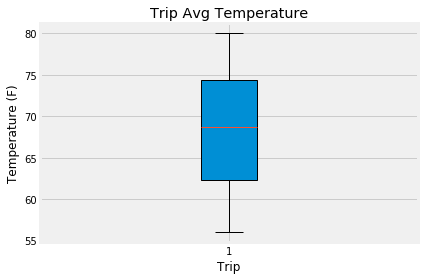

In [34]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots()
x = range(len(tripavgtemp))
ax.boxplot(tripavgtemp, patch_artist=True)
ax.set_title('Trip Avg Temperature')
ax.set_ylabel("Temperature (F)")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

In [48]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2015-12-31'
end_date = '2016-03-31'

data = [Station.station, Station.name, Station.latitude, 
       Station.longitude, Station.elevation, func.sum(Measurement.prcp)]

total_rain=session.query(*data).\
    filter(Measurement.station == Station.station).\
    filter(Measurement.date >= start_date).\
    filter(Measurement.date <= end_date).\
    group_by(Station.name).\
    order_by(Measurement.date.desc()).all()
total_rain

[('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  5.2799999999999985),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  3.509999999999999),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  1.3800000000000003),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  6.849999999999998),
 ('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  8.02),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  8.849999999999996)]

In [28]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [49]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start = '2018-01-01'
trip_end = '2018-01-07'
# Use the start and end date to create a range of dates
trip_dates = pd.date_range(trip_start, trip_end, freq='D')

# Stip off the year and save a list of %m-%d strings
trip_month_day = trip_dates.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in trip_month_day:
    normals.append(*daily_normals(date))
    
normals

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [53]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['tmin','tavg','tmax'])
df['date']=trip_dates
df.set_index(['date'],inplace= True)
df.head()

,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


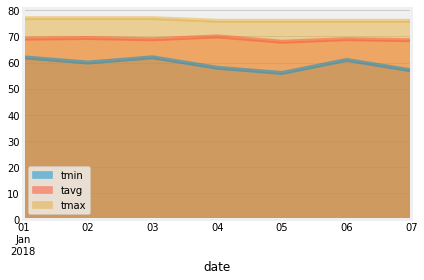

In [54]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot(kind = 'area', stacked = False)
plt.tight_layout()